---

# Reconhecimento de Padrões - SIN492

## Projeto prático - Período de Verão 2024-0
### Sistemas de Informação, Universidade Federal de Viçosa - Campus Rio Paranaíba 

### Alunas:
 - Sabrina Dias Guimarães - 7639
 - Thalyta Maely Correa - 6392
 - Viviane Renizia Mendes Silva - 5209

### Professores:
 - Profª. Me. Larissa Ferreira Rodrigues Moreira
 - Prof. Me. Leandro Henrique Furtado P. Silva

---

## Reconhecimento de Padrões - Inteligência Artificial
O reconhecimento de padrões é um conceito fundamental em *machine learning*, e é essencial na criação de sistemas que podem aprender e tomar decisões com base em dados. Essa tecnologia permite que os computadores identifiquem padrões e regularidades em conjuntos de dados, possibilitando a classificação, a previsão e a identificação de tendências.

No reconhecimento de padrões, os algoritmos de aprendizado de máquina analisam e comparam dados para encontrar semelhanças ou diferenças. Isso pode ser aplicado em diversos campos, como reconhecimento facial, análise de sentimentos, diagnóstico médico e processamento de linguagem natural.


Os sistemas de reconhecimento de padrões são treinados usando grandes conjuntos de dados, nos quais aprendem a identificar correlações e características importantes. Uma vez treinados, esses sistemas podem aplicar esse conhecimento para interpretar novos dados, fazendo previsões ou identificando categorias relevantes.



| A eficácia do reconhecimento de padrões depende da qualidade e da quantidade dos dados utilizados no treinamento, assim como da precisão dos algoritmos. Com o avanço da inteligência artificial, o reconhecimento de padrões está se tornando cada vez mais sofisticado, permitindo aplicações mais complexas e precisas em uma variedade de indústrias. | ![Pattern Recognition](https://soothsayeranalytics.com/home-assets/img/solutions-images/pattern-recognition-image.jpg) |
| ----------------- | ------------------------------------------------------------ |
---

## Base de dados fornecida
A base de dados [dataset_SIN492.parquet](https://drive.google.com/file/d/1haNcYaDGCMbZAX3jmX_5pkkYraQ0Wdwa/view) possui 466 entradas e é composta inicialmente por 16 features (feature0, feature1, ..., feature15) e uma coluna target que corresponde a classe. A coluna target é *zero* indicando a não ocorrência do evento que deseja-se prever e *um* quando ha ocorrência do evento que deseja-se prever.

---

## Objetivos
- Praticar e aprimorar conceitos de Reconhecimento de Padrões.
- Solidificar conceitos de gerenciamento de projetos e sua implementacão (Full Stack).
- Induzir o aprendizado e pratica da escrita científica.
- Aprimorar as capacidades de programacão
  
---

## Atividades
- Analise exploratória dos dados.
- Preparacão dos dados.
- Modelagem.
- Avaliacão e Performance dos Modelos.
- Interpretação dos Resultados.
- Entrega do Projeto.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

---
## Análise dos Dados

Antes de iniciar qualquer análise, é necessário verificar a estrutura do  *dataset*. Desse modo, serão analisadas as 5 primeiras entradas:

In [2]:
file_path = 'data/dataset_SIN492.parquet'

df = pd.read_parquet(file_path)

# Apenas salvando uma versão .csv do arquivo
df.to_csv("data/dataset_SIN492.csv")

df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


Após verificar a estrutura do *dataset*, podemos observar que:

O conjunto possui várias colunas nomeadas desde 'feature0' até 'feature15', além de uma coluna 'target'. Os valores nessas colunas são numéricos e variam significativamente em magnitude, sugerindo que o conjunto de dados pode conter diferentes tipos de características (features), possivelmente de diferentes domínios ou métricas (medidas).

Precisamos entender o significado e a origem de cada característica para realizar uma análise mais aprofundada. Além disso, devemos realizar uma etapa de pré-processamento dos dados, como normalização ou padronização, principalmente considerando o objetivo de utilizar um modelo de aprendizado de máquina, que são modelos sensíveis à escala dos dados.

O índice do dataframe está estranho, como se linhas tivessem sido removidas, ou filtradas antes de salvar o arquivo, vamos redefinir o índice.


### **Redefinindo o índice**

In [3]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


### **Quantidade de atributos (variáveis) e de entradas do conjunto de dados**

In [4]:
print(f'Entradas no DataFrame: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df.shape[1]} colunas no total')

Entradas no DataFrame: 466 linhas no total
Variáveis no DataFrame: 17 colunas no total


### **Verificando o tipo dos dados**

In [5]:
display(df.dtypes)

feature0     float64
feature1       int64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6       int64
feature7     float64
feature8     float64
feature9       int64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15      int64
target         int64
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [6]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Variáveis faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Variáveis faltantes,Porcentagem


Pode-se notar que, surpreendentemente, nenhuma variável no *dataset* apresenta valores ausentes!

### **Tipo de distribuição das variáveis** 

Será utilizado o **histograma** para identificar a distribuição das variáveis do *dataset*. 

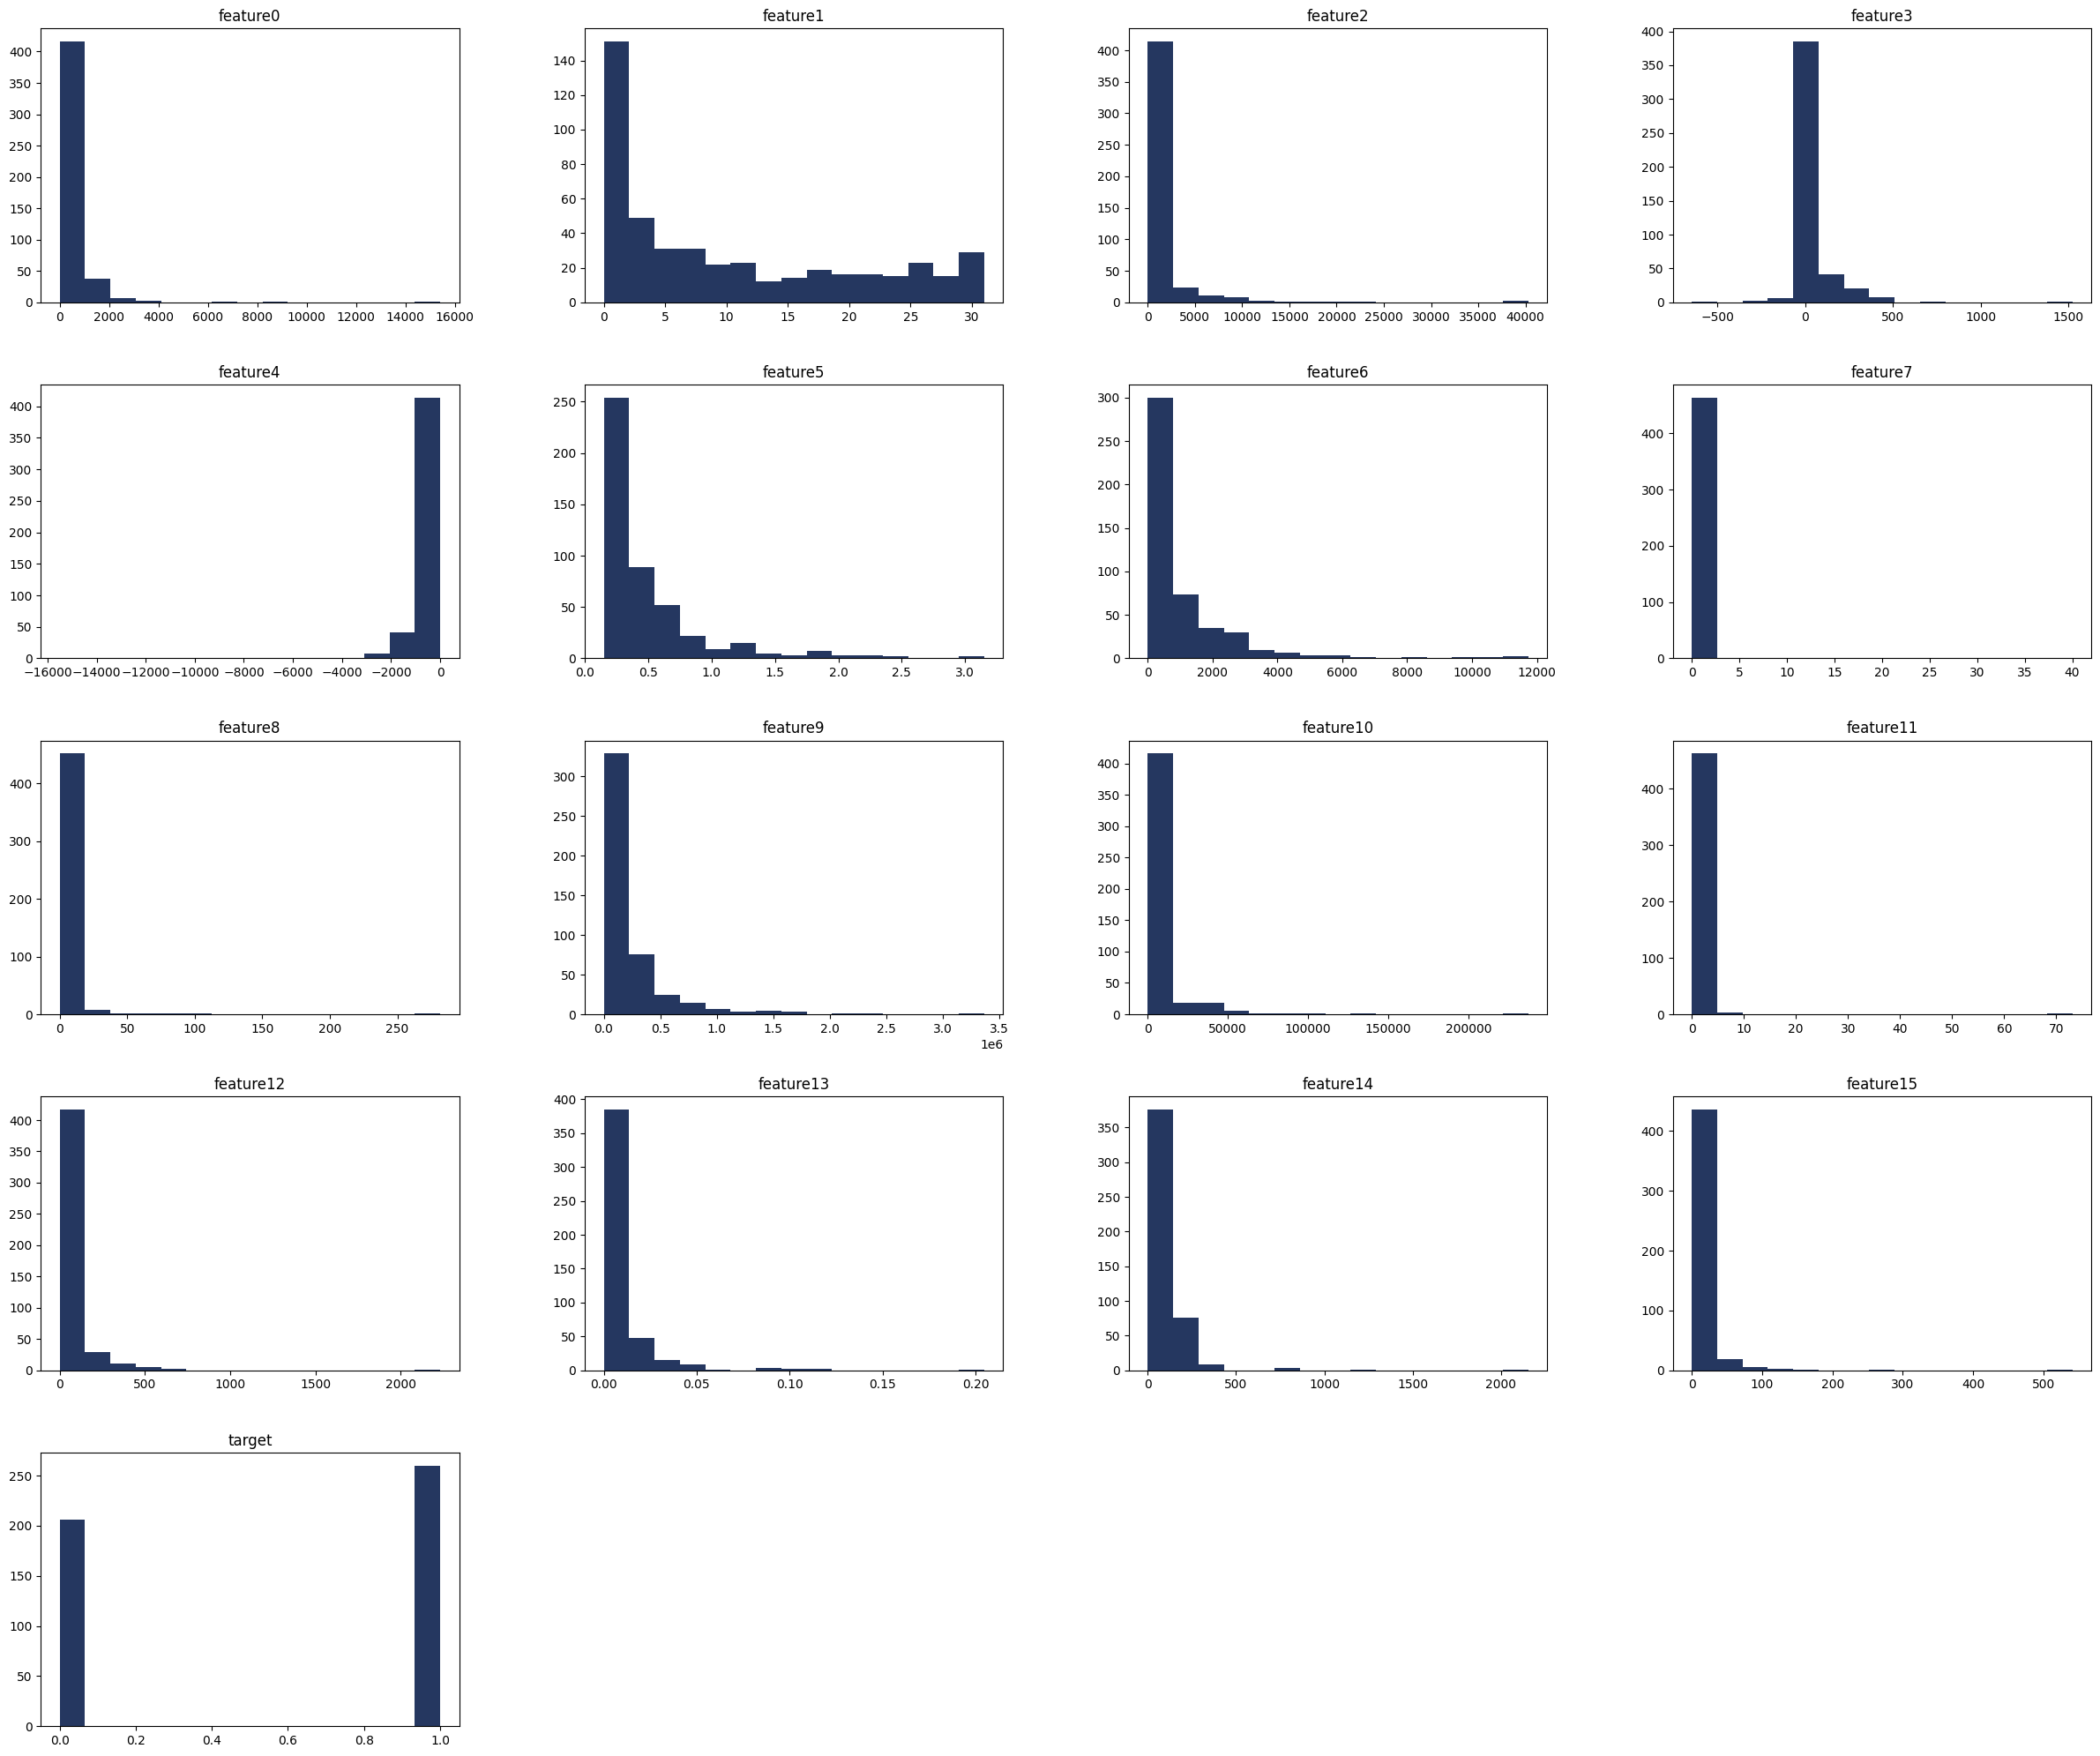

In [7]:
df.hist(bins=15, figsize=(30, 25), grid=False, color="#253760");

Com o histograma é possível notar que:

- feature0: Há uma pequena quantidade de valores muito mais altos que a maioria dos dados.
- feature3: Observa-se uma barra isolada à esquerda, sugerindo a presença de outliers negativos.
- feature4: Similar à feature0, parece haver uma concentração de valores em um extremo da distribuição.
- feature6: Apesar de a maioria dos dados estar concentrada no lado esquerdo, há valores espalhados até um valor muito alto, indicando possíveis outliers.
- feature10: A maioria dos valores está concentrada no início do histograma, mas há uma barra isolada mais à direita.
- feature12: Há uma concentração massiva de valores em um extremo e um valor isolado, indicando um possível outlier.

Porém, um histograma não é a melhor forma de verificar inconsistências, por isso, vamos avançar para outras análises.

#### **Verificação de Outliers** 
***Outliers*** podem influenciar a análise de dados, já que, por serem valores que se diferenciam significativamente do restante dos dados de um *dataset*, podem influenciar a análise para um viés que não represente a realidade da melhor forma. 

Vamos verificar as observações que fizemos através do histograma com uma análise descritiva dos dados, gráficos boxplot e matriz de correlação.

#### - Análise descritiva dos dados

In [8]:
descriptive_stats = df.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,10.257511,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,9.858908,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,7.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,18.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


- **Contagem de Dados:** Cada feature tem 466.000 observações, indicando que não há valores ausentes nessas colunas, como já visto anteriormente.

- **Média:** O valor médio para cada característica varia consideravelmente, indicando diferentes escalas e distribuições. Por exemplo, a feature1 tem uma média próxima a 10, enquanto a feature10 tem uma média superior a 6000.

- **Desvio Padrão (std):** O desvio padrão também varia muito entre as features, o que sugere que a variação nos dados é bastante heterogênea, ou seja, a dispersão ou a variabilidade dos dados é muito diferente de uma característica para outra. Features com um desvio padrão alto, como a feature10, têm uma dispersão maior dos dados em torno da média.

- **Mínimo e Máximo (min, max):** Os valores mínimos e máximos revelam a amplitude dos dados. Algumas features apresentam valores negativos como mínimos, o que pode ser normal ou indicar outliers, depende do contexto.

- **Quartis (25%, 50%, 75%):** Os quartis fornecem uma visão da distribuição dos dados. O quartil de 50% é a mediana, que é o valor do meio quando os dados são ordenados. A comparação entre a mediana e a média pode indicar a assimetria (em uma distribuição simétrica, a média e a mediana seriam iguais) da distribuição dos dados.

> Quanto aos outliers, se há uma grande diferença entre o valor médio e a mediana, ou se os valores máximos/mínimos são muito distantes dos quartis Q1 e Q3, isso pode indicar a presença de outliers, vamos lidar com eles com o método Z-score.

**Outros pontos observados:** 

- Algumas features têm uma grande variação nos valores mínimos e máximos, por exemplo, a feature12 vai de 0 a 2322.100000, o que sugere que elas podem ser contínuas e possivelmente influenciadas por outliers.

- Features com um desvio padrão relativamente pequeno comparado à média, como a feature6 com uma média de aproximadamente 3.85 e um desvio padrão de aproximadamente 1.87, podem indicar uma distribuição mais concentrada de valores, o que poderia ser um indicativo de dados discretos (categóricos) ou de uma variável com menos variabilidade.

#### - Gráficos boxplot

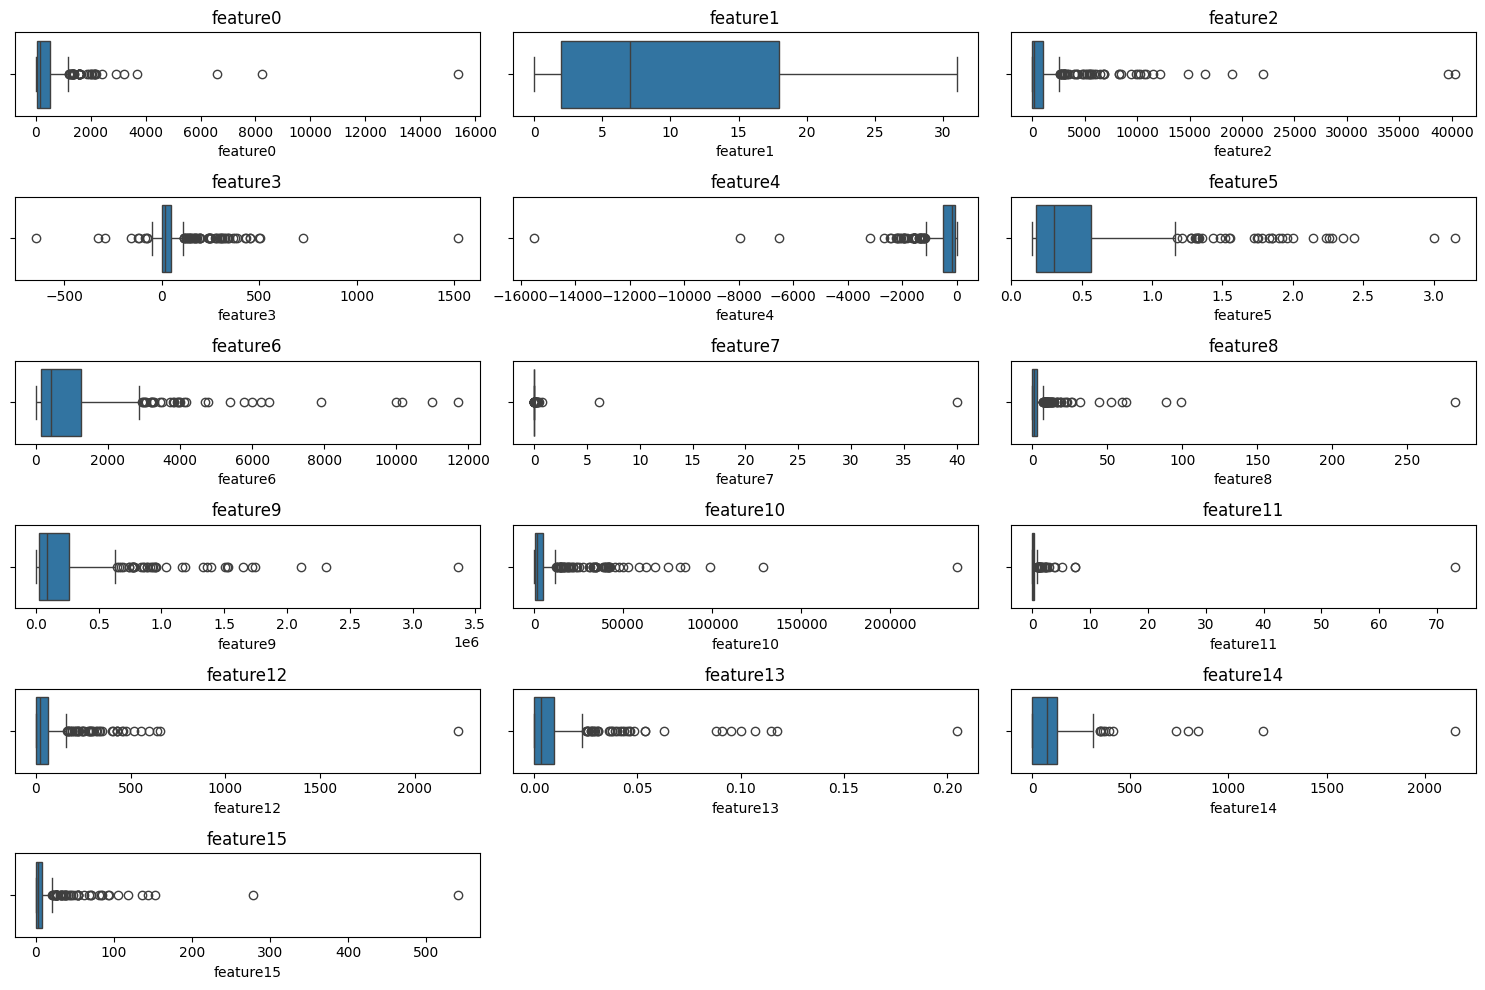

In [9]:
plt.rcParams["figure.figsize"] = (15, 10)

features = df.columns.drop(['target'])
n_features = len(features)

n_rows = math.ceil(n_features / 3)
fig, axes = plt.subplots(nrows=n_rows, ncols=3)

for i, col in enumerate(features):
    ax = axes[i//3, i%3]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for j in range(n_features, n_rows * 3):
    axes.flatten()[j].set_axis_off()

plt.tight_layout()
plt.show()

A partir dos boxplots das features podemos fazer as seguintes observações sobre cada uma delas:

- **feature0:** Distribuição com um amplo intervalo e assimetria à direita, indicando uma maioria de valores baixos e alguns outliers altos.
- **feature1:** Caixa estreita indicando uma concentração de valores em torno da mediana, com alguns outliers baixos.
- **feature2:** Esta característica tem um amplo intervalo, assimetria à direita e vários outliers altos.
- **feature3:** Aparenta ser bimodal com dois picos e outliers em ambas as extremidades.
- **feature4:** Faixa estreita de valores sem outliers.
- **feature5:** Distribuição com assimetria à direita, amplo intervalo e muitos outliers altos.
- **feature6:** Esta distribuição tem um pequeno intervalo de valores concentrados em torno da mediana sem outliers.
- **feature7:** Distribuição com assimetria à esquerda e outliers.
- **feature8:** Esta característica tem uma distribuição estreita e simétrica em torno da mediana sem outliers.
- **feature9:** Faixa muito estreita de valores fortemente agrupados em torno da mediana sem outliers.
- **feature10:** Amplo intervalo com assimetria à direita e vários outliers extremos.
- **feature11:** Pequena faixa de valores centrada em torno da mediana sem outliers.
- **feature12:** Distribuição estreita com um pequeno número de outliers em ambas as extremidades.
- **feature13:** Faixa muito estreita, os dados estão altamente concentrados sem outliers.
- **feature14:** Faixa estreita com uma leve assimetria à direita e alguns outliers altos.
- **feature15:** Caixa estreita com outliers, sugerindo que a maioria dos pontos de dados estão próximos da mediana, mas há extremos altos e baixos.

#### - Matriz de correlação

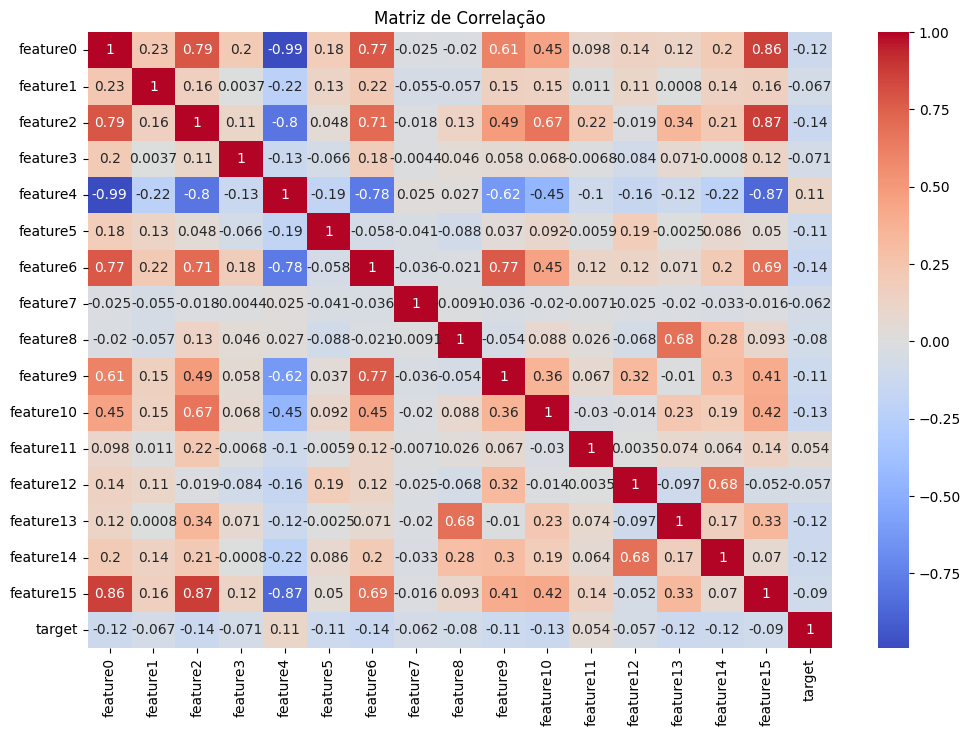

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

- feature0 e feature4 têm uma correlação negativa muito forte, como mencionado.
- feature6 e feature2 também têm uma forte correlação positiva, indicada pelo vermelho escuro.
- Há várias features com pouca ou nenhuma correlação entre si, como feature3 com muitas outras features, indicadas pela cor branca ou azul claro.
- A linha e a coluna target indicam a correlação de cada feature com a variável alvo. Neste caso, não parece haver uma correlação forte entre a variável alvo e as demais features. **A falta de correlação alta não descarta features como úteis, pois pode haver relações não lineares ou interações com outras variáveis que não são capturadas por coeficientes de correlação.

#### **Lidando com Outliers** 

Vamos utilizar o método Z-score para realizar essas verificações, através dos seguintes passos:

1. Calcular a média (μ) e o desvio padrão (σ) de cada variável.
2. Calcular o Z-score para cada observação x na variável usando a fórmula: Z = (x - μ)/σ
3. Identificar outliers: Observações com um Z-score acima de um certo limiar (comum usar valores como 3 ou -3**) são consideradas outliers.

** 3 ou -3 representa menos de 0,3% do total dos dados, ou seja, dado que 99,7% dos dados em uma distribuição normal estão dentro de três desvios padrão da média, uma observação com um Z-score acima de 3 ou abaixo de -3 é muito incomum. 
Esses valores estão tão distantes da média padrão que são considerados estatisticamente significativos e, portanto, são identificados como outliers.

In [14]:
z_scores = (df - df.mean()) / df.std()

threshold = 3

outliers = (z_scores.abs() > threshold)

for feature in outliers.columns:
    if outliers[feature].any():
        print(f"Outliers na {feature} pelo cálculo de Z-score:")
        print(df.loc[outliers[feature], feature])
    else:
        print(f"Outliers na {feature} pelo cálculo de Z-score:")
        print("Nenhum outlier encontrado!")
    print("\n")

Outliers na feature0 pelo cálculo de Z-score:
127     6600.0
227     3680.0
418     8240.0
429    15400.0
Name: feature0, dtype: float64


Outliers na feature1 pelo cálculo de Z-score:
Nenhum outlier encontrado!


Outliers na feature2 pelo cálculo de Z-score:
127    39673.40
198    22028.16
309    16513.30
417    14895.47
418    19078.48
429    40291.24
461    12133.73
Name: feature2, dtype: float64


Outliers na feature3 pelo cálculo de Z-score:
158     505.80
173    -329.60
227    1521.90
262     452.67
281    -645.87
282     723.99
298     431.85
307     424.50
344     451.35
434     499.60
Name: feature3, dtype: float64


Outliers na feature4 pelo cálculo de Z-score:
127    -6533.76
418    -7966.54
429   -15506.35
Name: feature4, dtype: float64


Outliers na feature5 pelo cálculo de Z-score:
2      2.430952
10     3.150000
18     1.853333
70     2.259639
103    3.000000
224    1.855675
314    1.904368
385    2.276090
389    2.140625
401    1.923051
404    2.236957
407    2.000000
4

In [12]:
df_cleaned = df[~outliers.any(axis=1)]
df_cleaned

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
5,850.0,9,1435.68,1.60,-848.40,0.589167,1440,0.003879,1.692221,371185,2745.78,0.522868,40.400000,0.014583,68.365714,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0.0,5,0.00,-0.10,-50.10,0.150000,334,0.011295,0.000000,29570,189.98,0.000000,0.000000,0.000000,0.000000,0,1
460,1050.0,9,1955.83,17.20,-1231.20,0.600000,1968,0.007718,1.656360,255002,3013.01,0.649128,73.800000,0.008130,122.239375,16,1
462,350.0,7,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
463,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0


In [13]:
print(f'Entradas no DataFrame antes da remoção de Outliers com Z-score: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame antes da remoção de Outliers com Z-score: {df.shape[1]} colunas no total\n')

print(f'Entradas no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned.shape[0]} linhas no total')
print(f'Variáveis no DataFrame depois da remoção de Outliers com Z-score: {df_cleaned.shape[1]} colunas no total')

Entradas no DataFrame antes da remoção de Outliers com Z-score: 466 linhas no total
Variáveis no DataFrame antes da remoção de Outliers com Z-score: 17 colunas no total

Entradas no DataFrame depois da remoção de Outliers com Z-score: 402 linhas no total
Variáveis no DataFrame depois da remoção de Outliers com Z-score: 17 colunas no total


#### **Análise estatística para verificar melhoria** 

In [17]:
descriptive_stats = df_cleaned.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,296.582488,10.027363,695.721294,35.707189,-298.119627,0.408167,781.731343,0.014308,2.343739,1.675627e+05,4452.946716,0.280216,50.319343,0.006176,71.463290,6.022388,0.584577
std,384.405127,9.697250,1482.272414,72.517299,386.190572,0.319920,906.575644,0.049010,4.609459,2.148473e+05,8656.814111,0.720965,83.887761,0.009219,76.366445,12.174213,0.493409
min,0.000000,0.000000,0.000000,-290.120000,-2066.600000,0.150000,1.000000,0.000663,0.000000,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2.000000,0.000000,-0.392500,-406.422500,0.166523,136.000000,0.003515,0.000000,2.110925e+04,339.487500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,6.500000,135.235000,17.980000,-138.200000,0.300000,399.000000,0.005244,0.868651,8.058050e+04,1171.200000,0.072402,18.354750,0.002802,65.106731,1.000000,1.000000
75%,422.500000,18.000000,757.977500,43.832500,-50.100000,0.518746,1112.250000,0.009699,2.471036,2.325090e+05,4216.265000,0.306167,62.519357,0.008475,109.543625,6.000000,1.000000
max,2100.000000,31.000000,11470.790000,384.000000,-0.260000,1.778947,4782.000000,0.717122,44.416667,1.185701e+06,59018.810000,7.436645,459.000000,0.053812,411.374348,105.000000,1.000000


- Os valores agora parecem ter uma distribuição melhor, como é o caso da feature12 que tinha como valor mínimo 0 e máximo 2232.100000, o que apontamos anteriormente como presença de outliers. Agora o valor máximo para essa feature é de 459.000000, uma diferença significativa.
- No geral, as diversas features alteradas demonstram melhoria na sua distribuição